In [21]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/Games Sales - Games (1).csv')

In [22]:
data.head(10)

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,-,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,-,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,-,2011-05-01,Action-adventure,Re-Logic,Re-Logic
5,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt
8,StarCraft,11.0,StarCraft,1998-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
9,The Sims,11.0,The Sims,2000-02-01,Life simulation,Maxis,Electronic Arts


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [5]:
#cek data
data.isna().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [6]:
#menghapus data terduplikasi
data.duplicated().sum()


2

In [7]:
#cek data terduplikasi
data[data.duplicated()]

,Name,Sales,Series,Release,Genre,Developer,Publisher
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1.0,StarCraft,11/1/2015,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [8]:
data_cleaned = data.copy()

# convert release to date format = (yyyy-dd-mm)
data_cleaned['Release'] = pd.to_datetime(data_cleaned['Release'])

# change null row in series column by '-'
data_cleaned['Series'] = data_cleaned['Series'].fillna('-')

# remove duplicated dataset
data_cleaned = data_cleaned.drop_duplicates(keep='first')

In [9]:
# check data after drop duplicates 
data_cleaned[data_cleaned.duplicated()]

,Name,Sales,Series,Release,Genre,Developer,Publisher


In [23]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     175 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


In [10]:
# save data_cleaned
data_cleaned.to_csv("Game Sales Cleaned.csv", index=False)
print()

In [11]:
release_sort = data_cleaned.sort_values(by='Release')
games_oldest_newest = pd.concat([release_sort.head(1), release_sort.tail(1)])
games_oldest_newest

,Name,Sales,Series,Release,Genre,Developer,Publisher
133,Hydlide,1.0,Hydlide,1984-12-01,Action role-playing,Technology and Entertainment Software,Technology and Entertainment Software
20,Valheim,6.0,-,2021-02-01,Survival,Iron Gate,Coffee Stain Publishing


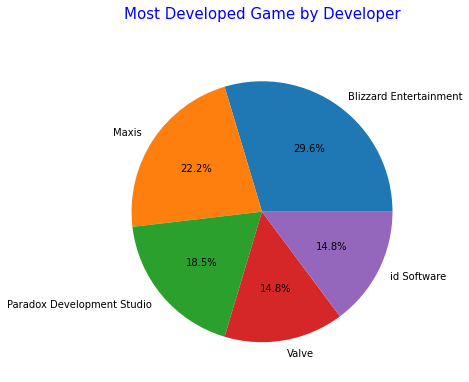

In [20]:
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/Game Sales Cleaned.csv')

y = np.array([8, 6, 5, 4, 4])
mylabels = ["Blizzard Entertainment", "Maxis", "Paradox Development Studio", "Valve", "id Software"]

plt.figure(figsize=(6,6))
plt.pie(y, labels = mylabels, autopct='%.1f%%')
plt.title('Most Developed Game by Developer',loc='center', pad=30, fontsize=15, color='blue')

plt.show() 

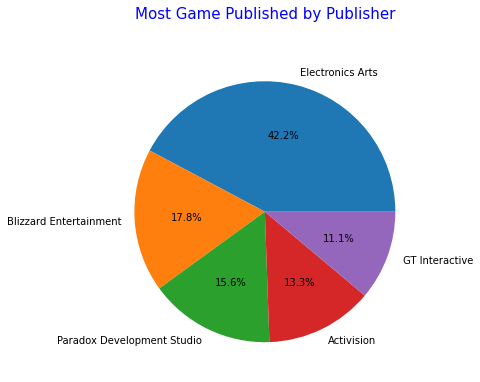

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Game Sales Cleaned.csv')
y = np.array([19, 8, 7, 6, 5])
mylabels = ["Electronics Arts", "Blizzard Entertainment", "Paradox Development Studio", "Activision"," GT Interactive"]

plt.figure(figsize=(6,6))
plt.pie(y, labels = mylabels, autopct='%.1f%%')
plt.title('Most Game Published by Publisher', loc='center', pad=30, fontsize=15, color='blue')
plt.show() 

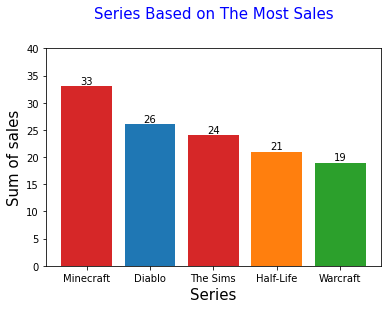

In [14]:
from pandas.core import series
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = ['Minecraft', 'Diablo', 'The Sims', 'Half-Life', 'Warcraft']
y = [33, 26, 24, 21, 19]

for i in range (len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange','tab:green']
ax.bar(x, y, color=bar_colors)

ax.set_xlabel('Series', fontsize=15)
ax.set_ylabel('Sum of sales', fontsize=15)
ax.set_title('Series Based on The Most Sales', loc='center', pad=30, fontsize=15, color='blue')
plt.ylim([0, 40])

plt.show()

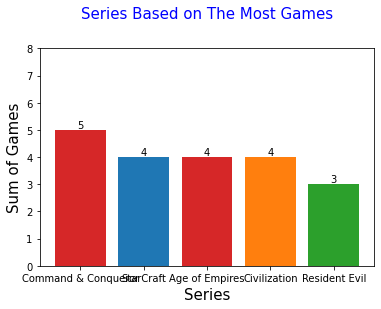

In [18]:
from pandas.core import series
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = ['Command & Conqueror', 'StarCraft', 'Age of Empires', 'Civilization', 'Resident Evil']
y = [5, 4, 4, 4, 3]

for i in range (len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange','tab:green']
ax.bar(x, y, color=bar_colors)

ax.set_xlabel('Series', fontsize=15)
ax.set_ylabel('Sum of Games', fontsize=15)
ax.set_title('Series Based on The Most Games', loc='center', pad=30, fontsize=15, color='blue')
plt.ylim([0, 8])

plt.show()